Probability of matches in 6-number draw from 49 numbers (6 known numbers):

#01 -- 0 matches: 43.59649755%
#02 -- 1 matches: 41.30194505%
#03 -- 2 matches: 13.23780290%
#04 -- 3 matches: 1.76504039%
#05 -- 4 matches: 0.09686197%
#06 -- 5 matches: 0.00184499%
#07 -- 6 matches: 0.00000715%

Probability of <3 matches: 98.136245%


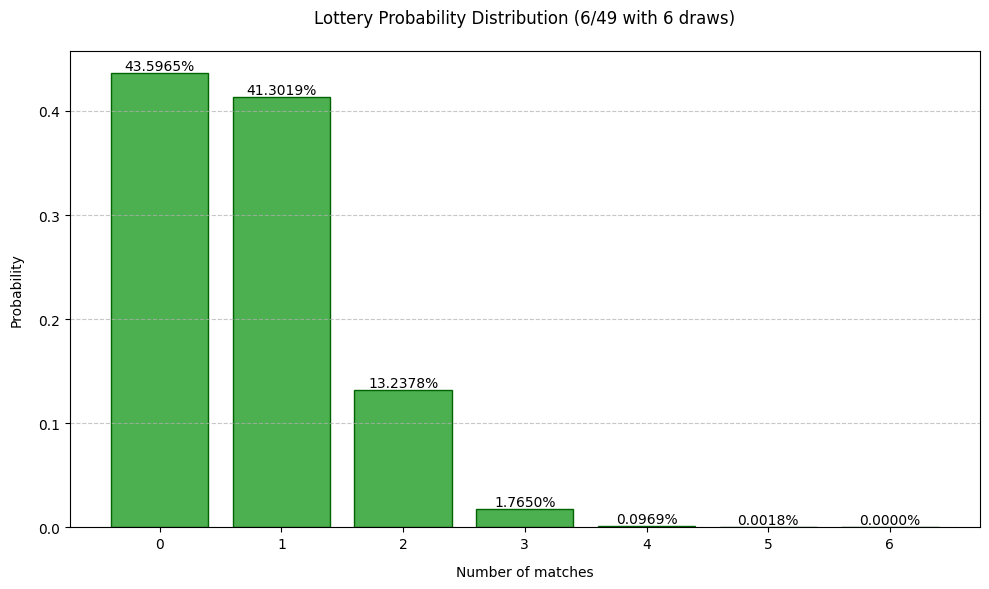

In [1]:
from math import comb
import matplotlib.pyplot as plt
from collections import defaultdict

# Configuration
K = 6  # Known numbers (typically 6 in 6/49 lotteries)
N = 49  # Total numbers in pool
n = 6  # Numbers drawn

# Calculate probabilities
d = defaultdict(float)
under_3 = 0.0

print(f"Probability of matches in {n}-number draw from {N} numbers ({K} known numbers):\n")

for k in range(min(K, n) + 1):
    prob = (comb(K, k) * comb(N - K, n - k)) / comb(N, n)
    d[k] = prob
    if k < 3:
        under_3 += prob
    print(f"#{k + 1:02} -- {k} matches: {prob * 100:.8f}%")

print(f"\nProbability of <3 matches: {under_3 * 100:.6f}%")

# Visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(d.keys(), d.values(), color='#4CAF50', edgecolor='darkgreen')

plt.title(f"Lottery Probability Distribution ({K}/{N} with {n} draws)", pad=20)
plt.xlabel("Number of matches", labelpad=10)
plt.ylabel("Probability", labelpad=10)
plt.xticks(list(d.keys()))

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{height * 100:.4f}%',
             ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('lottery_probabilities.png', dpi=300)
plt.show()
